In [2]:
import numpy as np 
import pandas as pd 

import nltk

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenov\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
data = pd.read_csv('data/tapera.csv')
data.shape

(1202, 15)

### **Prepocessing**

Case Folding

In [20]:
import re
import unicodedata

def casefolding(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'_', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [5]:
# Sample 10 random texts from the DataFrame
random_samples = data['full_text'].sample(n=10, random_state=42)

# Apply case folding to each sampled text
case_folded_samples = random_samples.apply(casefolding)

# Compare before and after case folding
comparison_df = pd.DataFrame({'Raw Data': random_samples, 'Case Folded': case_folded_samples})

# Alternatively, if you prefer to see the comparison in tabular form
comparison_df

,Raw Data,Case Folded
1133,@Cintada16 Pegawai swasta cuma dapet potongan ...,cintada pegawai swasta cuma dapet potongan tap...
425,@tempodotco Presiden pekok,tempodotco presiden pekok
78,@polisiidol Malah di ingetin lagi padahal udh ...,polisiidol malah di ingetin lagi padahal udh m...
803,@lafilledhiver_k ga nyambung tapi i love you 3...,lafilledhiverk ga nyambung tapi i love you dip...
590,@sosmedkeras mendingan cepet drpd keduluan ken...,sosmedkeras mendingan cepet drpd keduluan kena...
908,@bacottetangga_ lulus tk langsung kena potonga...,bacottetangga lulus tk langsung kena potongan ...
881,@DrEvaChaniago Wahhh telat dok keburu dilihat ...,drevachaniago wahhh telat dok keburu dilihat o...
543,@CNNIndonesia Salah satu alasan x ingin diblok...,cnnindonesia salah satu alasan x ingin dibloki...
1194,@Bams_4GP Tapera juga sama kayaknya. Bebas Tap...,bamsgp tapera juga sama kayaknya bebas tapera ...
930,@hafilova Belakangan ini lebih horor Twitter d...,hafilova belakangan ini lebih horor twitter da...


Normalisasi Kata

In [21]:
try:
    key_norm = pd.read_csv('data/key_norm.csv', encoding='latin1')
except UnicodeDecodeError:
    key_norm = pd.read_csv('data/key_norm.csv', encoding='ISO-8859-1')

def text_normalize(text):
    words = text.split()
    normalized_words = []
    for word in words:
        if (key_norm['singkat'] == word).any():
            normalized_word = key_norm[key_norm['singkat'] == word]['hasil'].values[0]
            print(f"Normalizing '{word}' to '{normalized_word}'")
            normalized_words.append(normalized_word)
        else:
            normalized_words.append(word)
    return ' '.join(normalized_words)

In [7]:
# Sample 10 random texts from the DataFrame
random_samples = data['full_text'].sample(n=10, random_state=42)

# Apply case folding to each sampled text
case_folded_samples = random_samples.apply(casefolding)
text_normalize_samples = case_folded_samples.apply(text_normalize)

# Compare before and after case folding
comparison_df = pd.DataFrame({'Raw Data': random_samples, 'text normalize': text_normalize_samples})

# Alternatively, if you prefer to see the comparison in tabular form
comparison_df

Normalizing 'udh' to 'sudah'
Normalizing 'you' to 'kamu'
Normalizing 'yg' to 'yang'
Normalizing 'phk' to 'pihak'


,Raw Data,text normalize
1133,@Cintada16 Pegawai swasta cuma dapet potongan ...,cintada pegawai swasta cuma dapet potongan tap...
425,@tempodotco Presiden pekok,tempodotco presiden pekok
78,@polisiidol Malah di ingetin lagi padahal udh ...,polisiidol malah di ingetin lagi padahal sudah...
803,@lafilledhiver_k ga nyambung tapi i love you 3...,lafilledhiverk ga nyambung tapi i love kamu di...
590,@sosmedkeras mendingan cepet drpd keduluan ken...,sosmedkeras mendingan cepet drpd keduluan kena...
908,@bacottetangga_ lulus tk langsung kena potonga...,bacottetangga lulus tk langsung kena potongan ...
881,@DrEvaChaniago Wahhh telat dok keburu dilihat ...,drevachaniago wahhh telat dok keburu dilihat o...
543,@CNNIndonesia Salah satu alasan x ingin diblok...,cnnindonesia salah satu alasan x ingin dibloki...
1194,@Bams_4GP Tapera juga sama kayaknya. Bebas Tap...,bamsgp tapera juga sama kayaknya bebas tapera ...
930,@hafilova Belakangan ini lebih horor Twitter d...,hafilova belakangan ini lebih horor twitter da...


Filtering (Stopword Removal)

In [22]:
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')
len(stopwords_ind)

758

In [23]:
# menambahkan kata dalam stopword
more_stopword = ['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo', 'kalo', 'amp', 'biar', 'bikin', 'bilang',
                 'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                 'jd', 'jgn', 'sdh', 'aja', 'n', 't', 'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', 
                 '&amp', 'yah', 'zy_zy', 'mh']
stopwords_ind.extend(more_stopword)

# Remove stopwords function
def remove_stop_word(text):
    words = text.split()
    clean_words = [word for word in words if word not in stopwords_ind]
    cleaned_text = ' '.join(clean_words)
    return cleaned_text

In [10]:
# Sample 10 random texts from the DataFrame
random_samples = data['full_text'].sample(n=10, random_state=42)

# Apply case folding to each sampled text
case_folded_samples = random_samples.apply(casefolding)
text_normalize_samples = case_folded_samples.apply(text_normalize)
remove_stop_word_samples = text_normalize_samples.apply(remove_stop_word)

# Compare before and after case folding
comparison_df = pd.DataFrame({'Raw Data': random_samples, 'Remove Stop Word': remove_stop_word_samples})

# Alternatively, if you prefer to see the comparison in tabular form
comparison_df

Normalizing 'udh' to 'sudah'
Normalizing 'you' to 'kamu'
Normalizing 'yg' to 'yang'
Normalizing 'phk' to 'pihak'


,Raw Data,Remove Stop Word
1133,@Cintada16 Pegawai swasta cuma dapet potongan ...,cintada pegawai swasta dapet potongan tapera
425,@tempodotco Presiden pekok,tempodotco presiden pekok
78,@polisiidol Malah di ingetin lagi padahal udh ...,polisiidol ingetin lupa tapera
803,@lafilledhiver_k ga nyambung tapi i love you 3...,lafilledhiverk nyambung i love dipotong tapera
590,@sosmedkeras mendingan cepet drpd keduluan ken...,sosmedkeras mendingan cepet drpd keduluan kena...
908,@bacottetangga_ lulus tk langsung kena potonga...,bacottetangga lulus tk langsung kena potongan ...
881,@DrEvaChaniago Wahhh telat dok keburu dilihat ...,drevachaniago wahhh telat dok keburu ombudsman...
543,@CNNIndonesia Salah satu alasan x ingin diblok...,cnnindonesia salah alasan x diblokir kominfo g...
1194,@Bams_4GP Tapera juga sama kayaknya. Bebas Tap...,bamsgp tapera kayaknya bebas tapera anaknya me...
930,@hafilova Belakangan ini lebih horor Twitter d...,hafilova horor twitter tubi isu tapera ukt kor...


Tokenize

In [24]:
# Tokenizing function
def tokenizing(text):
    return text.split()

In [12]:
# Sample 10 random texts from the DataFrame
random_samples = data['full_text'].sample(n=10, random_state=42)

# Apply case folding to each sampled text
case_folded_samples = random_samples.apply(casefolding)
text_normalize_samples = case_folded_samples.apply(text_normalize)
remove_stop_word_samples = text_normalize_samples.apply(remove_stop_word)
tokenizing_samples = remove_stop_word_samples.apply(tokenizing)

# Compare before and after case folding
comparison_df = pd.DataFrame({'Raw Data': random_samples, 'Tokenizing': tokenizing_samples})

# Alternatively, if you prefer to see the comparison in tabular form
comparison_df

Normalizing 'udh' to 'sudah'
Normalizing 'you' to 'kamu'
Normalizing 'yg' to 'yang'
Normalizing 'phk' to 'pihak'


,Raw Data,Tokenizing
1133,@Cintada16 Pegawai swasta cuma dapet potongan ...,"[cintada, pegawai, swasta, dapet, potongan, ta..."
425,@tempodotco Presiden pekok,"[tempodotco, presiden, pekok]"
78,@polisiidol Malah di ingetin lagi padahal udh ...,"[polisiidol, ingetin, lupa, tapera]"
803,@lafilledhiver_k ga nyambung tapi i love you 3...,"[lafilledhiverk, nyambung, i, love, dipotong, ..."
590,@sosmedkeras mendingan cepet drpd keduluan ken...,"[sosmedkeras, mendingan, cepet, drpd, keduluan..."
908,@bacottetangga_ lulus tk langsung kena potonga...,"[bacottetangga, lulus, tk, langsung, kena, pot..."
881,@DrEvaChaniago Wahhh telat dok keburu dilihat ...,"[drevachaniago, wahhh, telat, dok, keburu, omb..."
543,@CNNIndonesia Salah satu alasan x ingin diblok...,"[cnnindonesia, salah, alasan, x, diblokir, kom..."
1194,@Bams_4GP Tapera juga sama kayaknya. Bebas Tap...,"[bamsgp, tapera, kayaknya, bebas, tapera, anak..."
930,@hafilova Belakangan ini lebih horor Twitter d...,"[hafilova, horor, twitter, tubi, isu, tapera, ..."


Stemming

In [25]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Stemming function
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

In [14]:
# Sample 10 random texts from the DataFrame
random_samples = data['full_text'].sample(n=10, random_state=42)

# Apply the processing steps to each sampled text
processed_samples = []
for sample in random_samples:
    case_folded = casefolding(sample)
    word_normalized = text_normalize(case_folded)
    stopword_removed = remove_stop_word(word_normalized)
    tokens = tokenizing(stopword_removed)
    stemmed = stemming(' '.join(tokens))
    processed_samples.append(stemmed)

# Create a DataFrame to compare the original and processed texts
comparison_df = pd.DataFrame({
    'Raw Data': random_samples.values,
    'Stemming': processed_samples
})

comparison_df

Normalizing 'udh' to 'sudah'
Normalizing 'you' to 'kamu'
Normalizing 'yg' to 'yang'
Normalizing 'phk' to 'pihak'


,Raw Data,Stemming
0,@Cintada16 Pegawai swasta cuma dapet potongan ...,cintada pegawai swasta dapet potong tapera
1,@tempodotco Presiden pekok,tempodotco presiden kok
2,@polisiidol Malah di ingetin lagi padahal udh ...,polisiidol ingetin lupa tapera
3,@lafilledhiver_k ga nyambung tapi i love you 3...,lafilledhiverk nyambung i love potong tapera
4,@sosmedkeras mendingan cepet drpd keduluan ken...,sosmedkeras mending cepet drpd keduluan kena t...
5,@bacottetangga_ lulus tk langsung kena potonga...,bacottetangga lulus tk langsung kena potong ta...
6,@DrEvaChaniago Wahhh telat dok keburu dilihat ...,drevachaniago wahhh telat dok keburu ombudsman...
7,@CNNIndonesia Salah satu alasan x ingin diblok...,cnnindonesia salah alas x blokir kominfo gagal...
8,@Bams_4GP Tapera juga sama kayaknya. Bebas Tap...,bamsgp tapera kayak bebas tapera anak jabat po...
9,@hafilova Belakangan ini lebih horor Twitter d...,hafilova horor twitter tubi isu tapera ukt kor...


In [26]:
# membuat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = remove_stop_word(text)
    tokens = tokenizing(text)
    text = ' '.join(tokens)
    text = stemming(text)
    text = text_normalize(text)
    return text

In [16]:
data['clean_teks'] = data['full_text'].apply(text_preprocessing_process)

Normalizing 'ngomel' to 'mengomel'
Normalizing 'yg' to 'yang'
Normalizing 'trus' to 'terus'
Normalizing 'aja' to 'saja'
Normalizing 'udh' to 'sudah'
Normalizing 'pengen' to 'ingin'
Normalizing 'pake' to 'pakai'
Normalizing 'yg' to 'yang'
Normalizing 'udah' to 'sudah'
Normalizing 'yg' to 'yang'
Normalizing 'yg' to 'yang'
Normalizing 'naro' to 'naruh'
Normalizing 'simple' to 'simpel'
Normalizing 'sampe' to 'sampai'
Normalizing 'ngutang' to 'hutang'
Normalizing 'aja' to 'saja'
Normalizing 'yg' to 'yang'
Normalizing 'ngibul' to 'berkhayal'
Normalizing 'yg' to 'yang'
Normalizing 'tdk' to 'tidak'
Normalizing 'bs' to 'bisa'
Normalizing 'seneng' to 'senang'
Normalizing 'bs' to 'bisa'
Normalizing 'sj' to 'saja'
Normalizing 'udah' to 'sudah'
Normalizing 'aja' to 'saja'
Normalizing 'ane' to 'saya'
Normalizing 'yg' to 'yang'
Normalizing 'aja' to 'saja'
Normalizing 'tar' to 'nanti'
Normalizing 'abis' to 'habis'
Normalizing 'ngeluarin' to 'mengeluarkan'
Normalizing 'mikir' to 'berfikir'
Normalizing 

Dropping Kolom Kosong

In [17]:
data = data[data['clean_teks'].str.strip() != '']

In [18]:
data['clean_teks'].to_excel('data/Clean_Data.xlsx', index=False)

Translated Text

In [ ]:
from deep_translator import GoogleTranslator

def convert_eng(tweet):
    translation = GoogleTranslator(source='id', target='en').translate(tweet)
    return translation

# Assuming 'data' is your dataframe loaded from the CSV
data['tweet_english'] = data['clean_teks'].apply(convert_eng)


In [ ]:
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,clean_teks,tweet_english
0,1.802860e+18,Tue Jun 18 00:16:25 +0000 2024,1,BP Tapera Tegaskan 124.960 Peserta Telah Ditin...,1.802860e+18,https://pbs.twimg.com/media/GQUJpQFbEAAgmg_.jpg,NaN,in,NaN,0,0,1,https://x.com/masyitaarinra/status/18028578672...,1.751790e+18,masyitaarinra,bp tapera tegas serta ditindaklanjuti selesai ...,BP Tapera was firm and followed up to complete...
1,1.802860e+18,Tue Jun 18 00:15:22 +0000 2024,0,Belom bayar tapera...,1.802860e+18,NaN,NaN,in,NaN,0,0,0,https://x.com/heiythru/status/1802857601174261946,1.219840e+18,heiythru,bom bayar tapera,bomb pay tapera
2,1.802670e+18,Tue Jun 18 00:11:08 +0000 2024,0,@Kosasih0706 @zy_zy_lestary Kt projo : eitss k...,1.802860e+18,NaN,Kosasih0706,in,NaN,0,0,0,https://x.com/rtobg71/status/1802856537590989244,1.745330e+18,rtobg71,kosasih zyzylestary kt projo eitss tapera nala...,kosasih zyzylestary kt projo eitss tapera nala...
3,1.802860e+18,Tue Jun 18 00:06:49 +0000 2024,0,Setelah Tapera Pemerintah Canangkan Bank Tanah...,1.802860e+18,NaN,NaN,in,indonesia,0,0,0,https://x.com/posaktualcom/status/180285545129...,1.636630e+18,posaktualcom,tapera perintah canang bank tanah faisal basri,tapera orders canang land bank faisal basri
4,1.802850e+18,Tue Jun 18 00:01:05 +0000 2024,0,Emak gua ngomel perkara tapera yakali pns nutu...,1.802850e+18,NaN,NaN,in,Indonesia,0,0,0,https://x.com/xooyaxee/status/1802854006043423126,1.231230e+18,xooyaxee,emak gua omel perkara tapera yakali pns nutupi...,"My mother complained about the Tapera issue, m..."


In [ ]:
data.to_csv("data/Translete.csv")

### **LABELING DATA**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Inisiasi VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
def vader_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.01:
        return 'positive'
    else:
        return 'negative'

In [ ]:
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,clean_teks,tweet_english,sentiment
0,1.802860e+18,Tue Jun 18 00:16:25 +0000 2024,1,BP Tapera Tegaskan 124.960 Peserta Telah Ditin...,1.802860e+18,https://pbs.twimg.com/media/GQUJpQFbEAAgmg_.jpg,NaN,in,NaN,0,0,1,https://x.com/masyitaarinra/status/18028578672...,1.751790e+18,masyitaarinra,bp tapera tegas serta ditindaklanjuti selesai ...,BP Tapera was firm and followed up to complete...,negative
1,1.802860e+18,Tue Jun 18 00:15:22 +0000 2024,0,Belom bayar tapera...,1.802860e+18,NaN,NaN,in,NaN,0,0,0,https://x.com/heiythru/status/1802857601174261946,1.219840e+18,heiythru,bom bayar tapera,bomb pay tapera,negative
2,1.802670e+18,Tue Jun 18 00:11:08 +0000 2024,0,@Kosasih0706 @zy_zy_lestary Kt projo : eitss k...,1.802860e+18,NaN,Kosasih0706,in,NaN,0,0,0,https://x.com/rtobg71/status/1802856537590989244,1.745330e+18,rtobg71,kosasih zyzylestary kt projo eitss tapera nala...,kosasih zyzylestary kt projo eitss tapera nala...,negative
3,1.802860e+18,Tue Jun 18 00:06:49 +0000 2024,0,Setelah Tapera Pemerintah Canangkan Bank Tanah...,1.802860e+18,NaN,NaN,in,indonesia,0,0,0,https://x.com/posaktualcom/status/180285545129...,1.636630e+18,posaktualcom,tapera perintah canang bank tanah faisal basri,tapera orders canang land bank faisal basri,negative
4,1.802850e+18,Tue Jun 18 00:01:05 +0000 2024,0,Emak gua ngomel perkara tapera yakali pns nutu...,1.802850e+18,NaN,NaN,in,Indonesia,0,0,0,https://x.com/xooyaxee/status/1802854006043423126,1.231230e+18,xooyaxee,emak gua omel perkara tapera yakali pns nutupi...,"My mother complained about the Tapera issue, m...",negative


In [ ]:
data.to_excel('data/data.xlsx', index=False)

In [ ]:
random_texts = data[['full_text', 'clean_teks', 'sentiment']].sample(n=25)

random_texts.head(10)

,full_text,clean_teks,sentiment
976,@sofiesyarief Kan ada tapera,sofiesyarief tapera,negative
348,I need tapera so bad Tante pemburu remaja,i butuh tapera bad tante buru remaja,negative
1138,@bacottetangga_ Oh ini anak kecil yg disuruh d...,bacottetangga oh anak suruh daftar tapera wkwk,negative
227,@Kimberley_PS08 Bangun ginian pake apbn bisa g...,kimberleyps bangun ginian pakai apbn gilir nye...,positive
1056,@ChrisWibisana Nah pas! Negara butuh duit kan....,chriswibisana pas negara butuh duit cari orang...,negative
132,Tapera 'dipinjam' negara buat nutupin defisit ...,tapera pinjam negara nutupin defisit apbn ti k...,negative
968,@jokowi Tapera merusak ekonomi rakyat. Mikir,jokowi tapera rusak ekonomi rakyat berfikir,negative
1074,dana haji tapera nanti aplgi dana bos pkh otsus,dana haji tapera aplgi dana bos pkh otsus,positive
300,@sosmedkeras Contoh anak yang mampu bayar tape...,sosmedkeras contoh anak bayar tapera rb,negative
517,@narkosun Masih ada tapera cuma di tunda aja. ...,narkosun tapera tunda karyawan senyum wkwkwk,positive


### **VISUALISASI DATA**

Menghitung Correlation Score

In [ ]:
# karena nilai sentimen berbentuk string, lakukan perubahan sentimen menjadi nilai numerik
sentiment_encoding = {'positive': 1,  'negative': -1}
data['sentiment_num'] = data['sentiment'].map(sentiment_encoding)

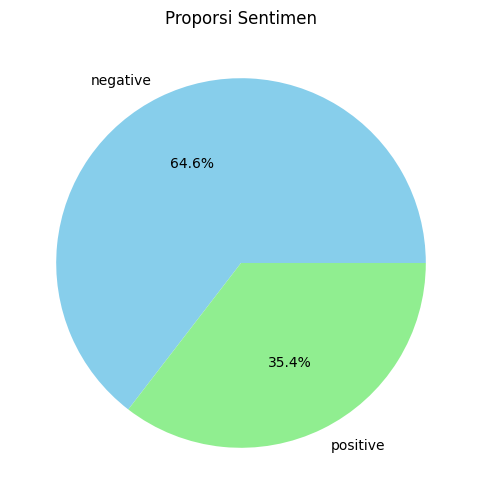

In [ ]:
# Menghitung jumlah masing-masing sentimen
sentimen_counts = data['sentiment'].value_counts()

# Plot diagram lingkaran
plt.figure(figsize=(6, 6))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen','lightcoral'])
plt.title('Proporsi Sentimen')
plt.show()

Text(0.5, 1.0, 'Word Cloud untuk Sentimen Positif')

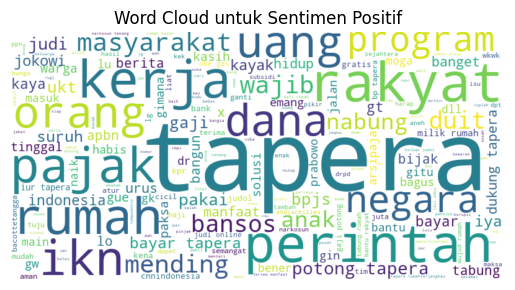

In [ ]:
from wordcloud import WordCloud

# Memfilter data untuk masing-masing sentimen
positive_tweets = data[data['sentiment'] == 'positive']['clean_teks']
negative_tweets = data[data['sentiment'] == 'negative']['clean_teks']

# Membuat WordCloud untuk sentimen positif
all_positive_text = ' '.join(positive_tweets)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(all_positive_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Sentimen Positif')

Text(0.5, 1.0, 'Word Cloud untuk Sentimen Negatif')

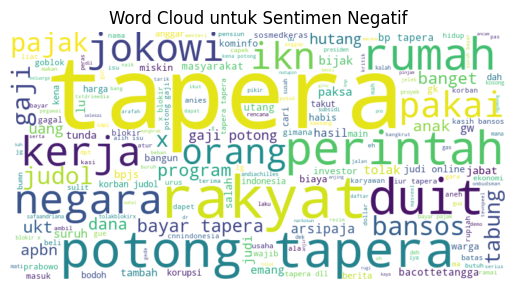

In [ ]:
from wordcloud import WordCloud

# Membuat WordCloud untuk sentimen negatif
all_negative_text = ' '.join(negative_tweets)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(all_negative_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Sentimen Negatif')

## **Model Development**

Imbalanced Data

In [120]:
# data.to_csv('data/modeling.csv')

In [44]:
data = pd.read_csv('data/modeling.csv')
data['sentiment'].value_counts()

sentiment
negative    775
positive    427
Name: count, dtype: int64

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pickle

# Fitting the vectorizer
tfidf = TfidfVectorizer(max_features=8000)
tfidf.fit(data['clean_teks'])
X_tfidf = tfidf.transform(data['clean_teks'])

# Saving the fitted vectorizer
with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(tfidf, vec_file)

y = data['sentiment']

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_tfidf, y)

# Check label counts after SMOTE
print("Label counts after SMOTE:")
print(pd.Series(y_smote).value_counts())

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Display train and test set shapes
print(f"Train set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Label counts after SMOTE:
sentiment
negative    775
positive    775
Name: count, dtype: int64
Train set shape: (1240, 4104), (1240,)
Test set shape: (310, 4104), (310,)


Menampilkan bobot dari contoh kalimat

In [109]:
# Get the feature names (terms)
terms = tfidf.get_feature_names_out()

# Function to get terms with non-zero TF-IDF scores
def get_tfidf_terms(doc_index):
    tfidf_row = X_tfidf[doc_index]
    non_zero_indices = tfidf_row.nonzero()[1]  # Get indices of non-zero elements
    terms_weights = [(terms[i], tfidf_row[0, i]) for i in non_zero_indices]
    return terms_weights

# Iterate over the first 10 documents and display their TF-IDF terms and weights
for i, text in enumerate(data['clean_teks'].head(10)):
    print(f"Text: {text}")
    print("TF-IDF Terms and Weights:")
    terms_weights = get_tfidf_terms(i)
    for term, weight in terms_weights:
        print(f"{term}: {weight:.4f}")
    print("\n" + "-"*80 + "\n")

Text: bp tapera tegas serta ditindaklanjuti selesai mbappe wisnu ipk daging pagi
TF-IDF Terms and Weights:
bp: 0.2420
tapera: 0.0527
tegas: 0.3165
serta: 0.2662
ditindaklanjuti: 0.3415
selesai: 0.3001
mbappe: 0.3613
wisnu: 0.3274
ipk: 0.3415
daging: 0.3415
pagi: 0.3001

--------------------------------------------------------------------------------

Text: bom bayar tapera
TF-IDF Terms and Weights:
tapera: 0.1391
bom: 0.8644
bayar: 0.4832

--------------------------------------------------------------------------------

Text: kosasih zyzylestary kt projo eitss tapera nalangin
TF-IDF Terms and Weights:
tapera: 0.0610
kosasih: 0.4184
zyzylestary: 0.3476
kt: 0.4184
projo: 0.4184
eitss: 0.4184
nalangin: 0.4184

--------------------------------------------------------------------------------

Text: tapera perintah canang bank tanah faisal basri
TF-IDF Terms and Weights:
tapera: 0.0708
perintah: 0.2280
canang: 0.4586
bank: 0.3866
tanah: 0.4031
faisal: 0.4586
basri: 0.4586

------------------

Menampilkan bobot dari TF-Idf sesuai label

In [110]:
from collections import defaultdict

# Get the feature names (terms)
terms = tfidf.get_feature_names_out()

# Function to get terms with non-zero TF-IDF scores and their weights
def get_tfidf_terms(doc_index):
    tfidf_row = X_tfidf[doc_index]
    non_zero_indices = tfidf_row.nonzero()[1]  # Get indices of non-zero elements
    terms_weights = [(terms[i], tfidf_row[0, i]) for i in non_zero_indices]
    return terms_weights

# Dictionary to hold the top 20 TF-IDF weights for each label
top_20_tfidf_per_label = defaultdict(lambda: defaultdict(float))

# Iterate over all documents
for i, (text, label) in enumerate(zip(data['clean_teks'], data['sentiment'])):
    terms_weights = get_tfidf_terms(i)
    
    # Aggregate the TF-IDF weights for each term per label
    for term, weight in terms_weights:
        if term.lower() != "tapera":  # Exclude the term "tapera"
            top_20_tfidf_per_label[label][term] += weight

# Process the top 20 terms for each label
top_20_tfidf_final = {}
for label, terms_weights_dict in top_20_tfidf_per_label.items():
    # Sort by TF-IDF weight in descending order and keep the top 20
    sorted_terms_weights = sorted(terms_weights_dict.items(), key=lambda x: x[1], reverse=True)[:20]
    top_20_tfidf_final[label] = sorted_terms_weights

# Display the top 20 TF-IDF weights for each label
for label, top_terms in top_20_tfidf_final.items():
    print(f"Label: {label}")
    print("Top 20 Terms with Highest TF-IDF Weights:")
    for term, weight in top_terms:
        print(f"{term}: {weight:.4f}")
    print("\n" + "-"*80 + "\n")


Label: negative
Top 20 Terms with Highest TF-IDF Weights:
potong: 24.6344
gaji: 14.4635
rakyat: 14.2460
bayar: 13.5025
duit: 13.0275
rumah: 11.6778
perintah: 10.7484
judol: 9.5170
kerja: 9.3116
negara: 9.2645
jokowi: 9.1625
ikn: 8.7930
bansos: 8.7265
tabung: 8.2894
arsipaja: 8.0081
pakai: 7.6429
sosmedkeras: 7.3573
pajak: 7.3135
bacottetangga: 7.0570
kena: 6.9481

--------------------------------------------------------------------------------

Label: positive
Top 20 Terms with Highest TF-IDF Weights:
rumah: 11.6687
dukung: 7.9554
program: 6.7514
kerja: 6.7293
rakyat: 6.6332
wajib: 6.6036
bayar: 6.4300
pajak: 6.2546
nabung: 6.0361
perintah: 5.8765
bantu: 5.8283
mending: 5.6750
orang: 5.2965
masyarakat: 5.1149
manfaat: 5.1132
judi: 4.9992
potong: 4.9149
tenang: 4.9032
iya: 4.6925
dana: 4.6053

--------------------------------------------------------------------------------



SVM

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define the SVM model
svm_model = SVC()

# Define the parameter grid for advanced hyperparameter tuning
svm_params = {
    'C': uniform(0.1, 100),  # Uniform distribution between 0.1 and 100
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Including more kernel types
    'degree': [2, 3, 4, 5, 6, 7, 8, 10],  # Expanded range for 'poly' kernel
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],  # Expanded range for 'rbf', 'poly', and 'sigmoid' kernels
    'coef0': [0.0, 0.1, 0.5, 1.0, 2.0, 3.0],  # Expanded range for 'poly' and 'sigmoid' kernels
    'class_weight': [None, 'balanced'],  # Class weight options
    'shrinking': [True, False],  # Shrinking heuristic
    'tol': [1e-3, 1e-4, 1e-5],  # Tolerance for stopping criteria
    'max_iter': [1000, 2000, 3000, 4000, 5000]  # Maximum number of iterations
}

# Perform RandomizedSearchCV
svm_random = RandomizedSearchCV(svm_model, svm_params, n_iter=50, cv=15, scoring='accuracy', random_state=42, n_jobs=-1)
svm_random.fit(X_train, y_train)

# Get the best estimator and predictions
svm_best = svm_random.best_estimator_
svm_pred = svm_best.predict(X_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, svm_pred)
precision_svm = precision_score(y_test, svm_pred, average='weighted')
recall_svm = recall_score(y_test, svm_pred, average='weighted')
f1_svm = f1_score(y_test, svm_pred, average='weighted')
svm_report = classification_report(y_test, svm_pred, target_names=['negative', 'positive'])

# Display the best parameters and classification report
print("Best parameters found: ", svm_random.best_params_)
print("Best cross-validation score: ", svm_random.best_score_)

print(f"SVM - Accuracy: {accuracy_svm}")
print(f"SVM - Precision: {precision_svm}")
print(f"SVM - Recall: {recall_svm}")
print(f"SVM - F1 Score: {f1_svm}")

# Generate classification report
print("\nClassification Report:\n")
print(svm_report)

Best parameters found:  {'C': 4.7450412719997725, 'class_weight': None, 'coef0': 2.0, 'degree': 2, 'gamma': 10, 'kernel': 'poly', 'max_iter': 4000, 'shrinking': True, 'tol': 0.0001}
Best cross-validation score:  0.8766186698011559
SVM - Accuracy: 0.8774193548387097
SVM - Precision: 0.8775691667654634
SVM - Recall: 0.8774193548387097
SVM - F1 Score: 0.8773477778854123

Classification Report:

              precision    recall  f1-score   support

    negative       0.88      0.86      0.87       150
    positive       0.87      0.89      0.88       160

    accuracy                           0.88       310
   macro avg       0.88      0.88      0.88       310
weighted avg       0.88      0.88      0.88       310



Naive Bayes

In [134]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Define the parameter grid for advanced hyperparameter tuning
nb_params = {
    'alpha': uniform(0.1, 1.0)  # Uniform distribution for alpha
}

# Perform RandomizedSearchCV
nb_random = RandomizedSearchCV(nb_model, nb_params, n_iter=50, cv=15, scoring='accuracy', random_state=42, n_jobs=-1)
nb_random.fit(X_train, y_train)

# Get the best estimator and predictions
nb_best = nb_random.best_estimator_
nb_pred = nb_best.predict(X_test)
accuracy_nb = accuracy_score(y_test, nb_pred)
precision_nb = precision_score(y_test, nb_pred, average='weighted')
recall_nb = recall_score(y_test, nb_pred, average='weighted')
f1_nb = f1_score(y_test, nb_pred, average='weighted')
nb_report = classification_report(y_test, nb_pred)

# Display the best parameters and classification report
print("Best Parameters:", nb_random.best_params_)
print(f"Naive Bayes - Accuracy: {accuracy_nb}")
print(f"Naive Bayes - Precision: {precision_nb}")
print(f"Naive Bayes - Recall: {recall_nb}")
print(f"Naive Bayes - F1 Score: {f1_nb}")

# Generate classification report
class_report_nb = classification_report(y_test, nb_pred, target_names=['negative', 'positive'])
print("\nClassification Report:\n")
print(class_report_nb)


Best Parameters: {'alpha': 0.15808361216819947}
Naive Bayes - Accuracy: 0.8258064516129032
Naive Bayes - Precision: 0.8343739160596599
Naive Bayes - Recall: 0.8258064516129032
Naive Bayes - F1 Score: 0.8240866385112374

Classification Report:

              precision    recall  f1-score   support

    negative       0.89      0.73      0.80       150
    positive       0.78      0.91      0.84       160

    accuracy                           0.83       310
   macro avg       0.84      0.82      0.82       310
weighted avg       0.83      0.83      0.82       310



In [27]:
# Function to classify new input text
def classify_text(text, vectorizer, model):
    # Add your text preprocessing steps here
    processed_text = text_preprocessing_process(text)
    text_tfidf = vectorizer.transform([processed_text])
    svm_best = model.predict(text_tfidf)
    
    return {'SVC': svm_best[0]}

# Example usage with user input
input_text = input("Masukkan teks yang ingin diklasifikasikan: ")
results = classify_text(input_text, tfidf, svm_best)

print("Input kata:", input_text)
print("\nHasil Klasifikasi:")
for model, prediction in results.items():
    print(f"{model}: {prediction}")

Input kata: bagus

Hasil Klasifikasi:
SVC: positive


Saving model

In [47]:
import pickle

# Save the fitted SVM model
with open('model/model.pkl', 'wb') as model_file:
    pickle.dump(svm_best, model_file)
